In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.python.framework.config import list_physical_devices
import os

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [5]:
(img_train, lab_train), (img_test, lab_test) = tf.keras.datasets.cifar10.load_data()
img_valid, img_train = img_train[-5000:] / 255.0, img_train[:-5000] / 255.0
lab_valid, lab_train = lab_train[-5000:], lab_train[:-5000]
img_test = img_test / 255.0

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

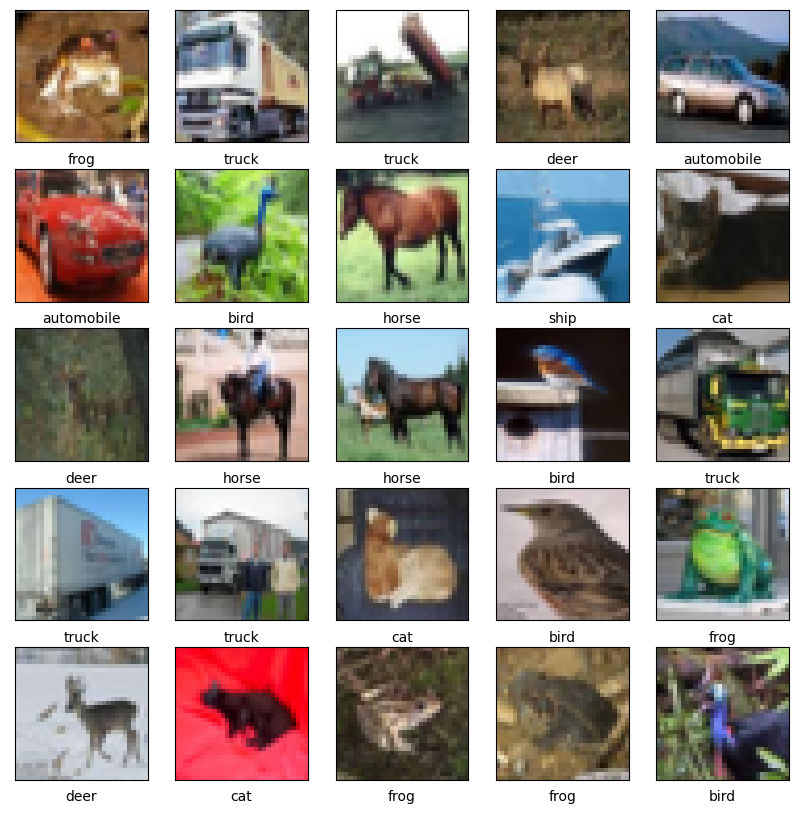

In [12]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_train[i], cmap = 'binary')
    plt.xlabel(class_names[lab_train[i][0]])
plt.show()

In [52]:
def save_model(model, version:str):
    file_path = os.getcwd()
    model.save(os.path.join(file_path, "trained_model", version))

In [18]:
def plot_history(history, model_name):
    history_dict = history.history
    pd.DataFrame(history_dict).plot(figsize = (10, 6))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.title('Accuracy and loss for both training and validation {0}'.format(model_name), fontsize = 16)
    plt.xlabel('Epochs', fontsize = 16)
    plt.ylabel('Accuracy and loss percentage', rotation = 90, fontsize = 16)
    plt.show()

Model 1

In [20]:
def Model():
    return keras.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
        keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size = (2,2)),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ])

In [28]:
model1 = Model()

In [29]:
opt1 = keras.optimizers.Adam(learning_rate = 0.001)
model1.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = opt1,
             metrics = ['accuracy'],
             )
history1 = model1.fit(img_train, lab_train, epochs = 10, validation_data = (img_valid, lab_valid))

Epoch 1/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3731 - accuracy: 0.5028 - val_loss: 1.0818 - val_accuracy: 0.6126
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9195 - accuracy: 0.6727 - val_loss: 0.8226 - val_accuracy: 0.7112
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7423 - accuracy: 0.7403 - val_loss: 0.8339 - val_accuracy: 0.7186
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6189 - accuracy: 0.7823 - val_loss: 0.7467 - val_accuracy: 0.7454
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5065 - accuracy: 0.8220 - val_loss: 0.7946 - val_accuracy: 0.7410
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4098 - accuracy: 0.8554 - val_loss: 0.7924 - val_accuracy: 0.7548
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3250 - accuracy: 0.8848 - val_loss: 0.8781 - val_accuracy:

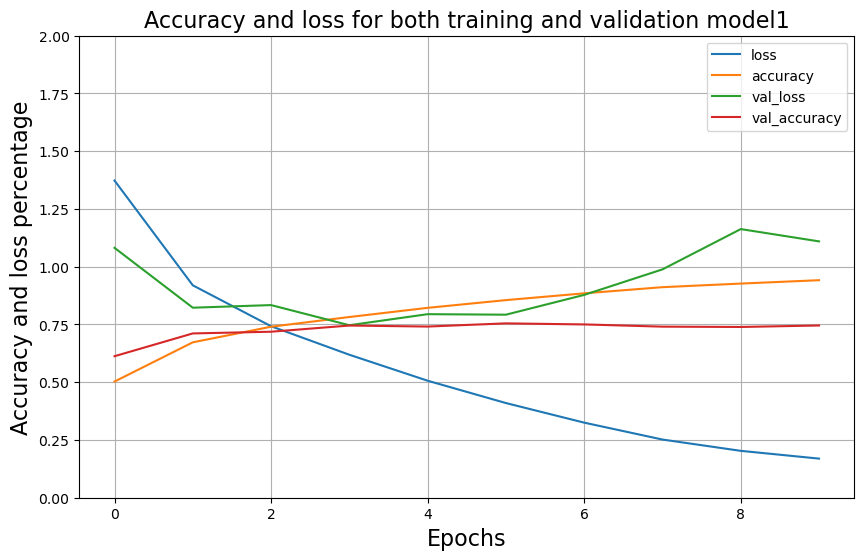

In [30]:
plot_history(history1, "model1")

Model2

In [31]:
def Model():
    return keras.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
        keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size = (2,2)),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ])

In [39]:
model2 = Model()

In [40]:
opt2 = keras.optimizers.Adam(learning_rate = 0.001)
model2.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = opt2,
             metrics = ['accuracy'],
             )
history2 = model2.fit(img_train, lab_train, epochs = 20, validation_data = (img_valid, lab_valid))

Epoch 1/20
1407/1407 [==============================] - 10s 6ms/step - loss: 1.5465 - accuracy: 0.4317 - val_loss: 1.2522 - val_accuracy: 0.5586
Epoch 2/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.0413 - accuracy: 0.6318 - val_loss: 0.8909 - val_accuracy: 0.6932
Epoch 3/20
1407/1407 [==============================] - 8s 5ms/step - loss: 0.8159 - accuracy: 0.7115 - val_loss: 0.8308 - val_accuracy: 0.7096
Epoch 4/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.6798 - accuracy: 0.7620 - val_loss: 0.7075 - val_accuracy: 0.7562
Epoch 5/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.5745 - accuracy: 0.8002 - val_loss: 0.7501 - val_accuracy: 0.7460
Epoch 6/20
1407/1407 [==============================] - 8s 5ms/step - loss: 0.4812 - accuracy: 0.8313 - val_loss: 0.7189 - val_accuracy: 0.7628
Epoch 7/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4105 - accuracy: 0.8564 - val_loss: 0.7108 - val_accuracy

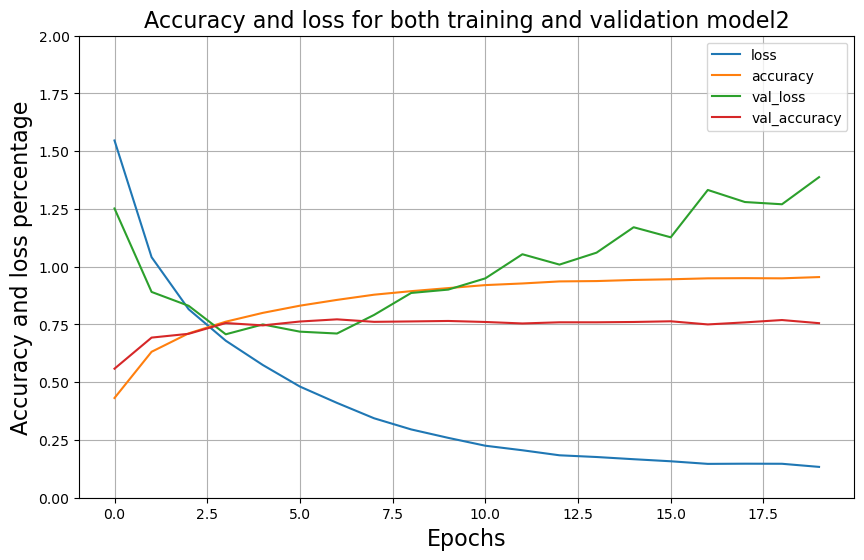

In [41]:
plot_history(history2, "model2")

Model3

In [42]:
def Model():
    return keras.Sequential([
        keras.layers.RandomFlip('horizontal_and_vertical'),
        keras.layers.RandomRotation(0.2),
        keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.MaxPool2D(),

        keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
        keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size = (2,2)),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')
    ])

In [43]:
model3 = Model()

In [46]:
opt3 = keras.optimizers.Adam(learning_rate = 0.001)
model3.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = opt3,
             metrics = ['accuracy'],
             )
history3 = model3.fit(img_train, lab_train, epochs = 20, validation_data = (img_valid, lab_valid))

Epoch 1/80
1407/1407 [==============================] - 11s 7ms/step - loss: 1.1122 - accuracy: 0.6076 - val_loss: 1.0918 - val_accuracy: 0.6156
Epoch 2/80
1407/1407 [==============================] - 10s 7ms/step - loss: 1.1113 - accuracy: 0.6066 - val_loss: 1.0676 - val_accuracy: 0.6156
Epoch 3/80
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0983 - accuracy: 0.6105 - val_loss: 1.1056 - val_accuracy: 0.6108
Epoch 4/80
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0961 - accuracy: 0.6112 - val_loss: 1.1342 - val_accuracy: 0.6008
Epoch 5/80
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0989 - accuracy: 0.6099 - val_loss: 1.1149 - val_accuracy: 0.6112
Epoch 6/80
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0918 - accuracy: 0.6123 - val_loss: 1.1756 - val_accuracy: 0.5926
Epoch 7/80
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0896 - accuracy: 0.6160 - val_loss: 1.0925 - val_ac

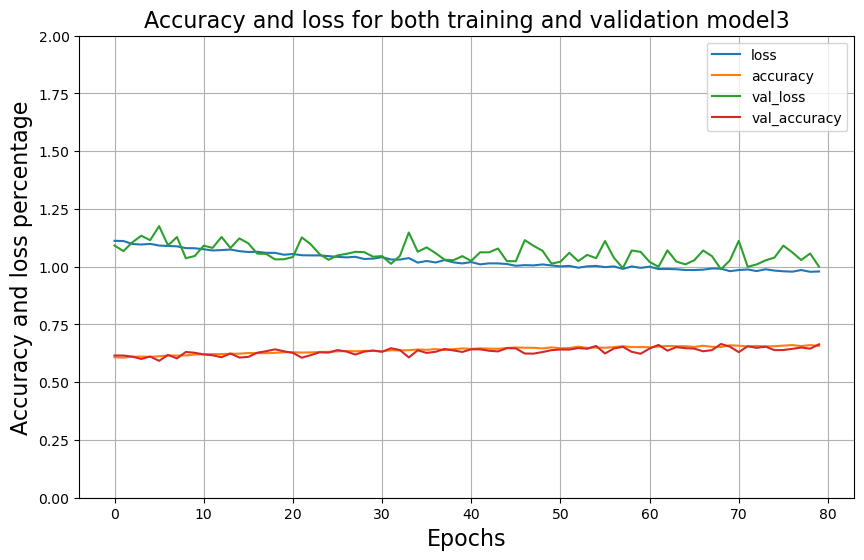

In [47]:
plot_history(history3, "model3")

Model4

In [48]:
def Model():
    return keras.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
        keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Dropout(0.2),
        keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Dropout(0.3),
        keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Dropout(0.4),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation = 'softmax')
    ])

In [49]:
model4 = Model()

In [50]:
opt4 = keras.optimizers.Adam(learning_rate = 0.001)
model4.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = opt4,
             metrics = ['accuracy'],
             )
history4 = model4.fit(img_train, lab_train, epochs = 20, validation_data = (img_valid, lab_valid))

Epoch 1/40
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7990 - accuracy: 0.3303 - val_loss: 1.3972 - val_accuracy: 0.4742
Epoch 2/40
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3884 - accuracy: 0.4971 - val_loss: 1.1365 - val_accuracy: 0.5868
Epoch 3/40
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2250 - accuracy: 0.5614 - val_loss: 0.9934 - val_accuracy: 0.6480
Epoch 4/40
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1271 - accuracy: 0.6016 - val_loss: 0.9716 - val_accuracy: 0.6532
Epoch 5/40
1407/1407 [==============================] - 8s 6ms/step - loss: 1.0598 - accuracy: 0.6271 - val_loss: 0.8745 - val_accuracy: 0.6926
Epoch 6/40
1407/1407 [==============================] - 8s 6ms/step - loss: 1.0104 - accuracy: 0.6448 - val_loss: 0.8792 - val_accuracy: 0.6942
Epoch 7/40
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9718 - accuracy: 0.6605 - val_loss: 0.7992 - val_accuracy:

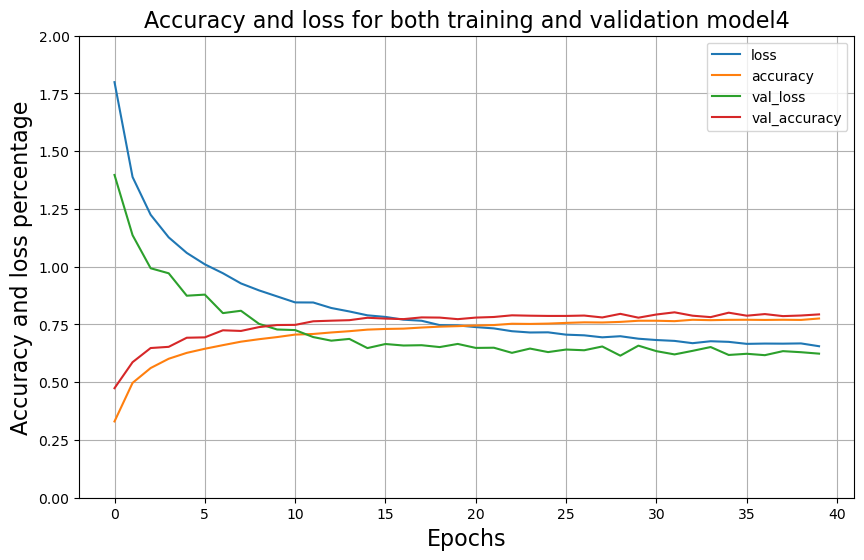

In [51]:
plot_history(history4, "model4")

save model

In [53]:
save_model(model1, "1")
save_model(model2, "2")
save_model(model3, "3")
save_model(model4, "4")

INFO:tensorflow:Assets written to: d:\1_McMaster_Year4\ML-Project\trained_model\1\assets
INFO:tensorflow:Assets written to: d:\1_McMaster_Year4\ML-Project\trained_model\2\assets
INFO:tensorflow:Assets written to: d:\1_McMaster_Year4\ML-Project\trained_model\3\assets
INFO:tensorflow:Assets written to: d:\1_McMaster_Year4\ML-Project\trained_model\4\assets
